In [1]:
import os 
import glob
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
os.chdir('/mnt/BioHome/jreyna/jreyna/projects/dchallenge/')

outdir = 'results/main/sgls/summary/'
os.makedirs(outdir, exist_ok=True)

pd.options.display.max_columns = 1000

In [30]:
sgl_fns = glob.glob('results/main/GRCh37/sgls/ldpairs/*/*/*/*/*/full_eqtl_ss/master.tsv') 
sgl_fns = [x for x in sgl_fns if 'backup' not in x]

data = []
for fn in sgl_fns:
    
    split_info = fn.split('/')
    
    # get the current json string for the current file  
    gwas_source, eqtl_source, ge_source, loop_source = split_info[6:10] 
    
    df = pd.read_table(fn)
    df.loc[:, 'gwas_source'] = gwas_source
    df.loc[:, 'eqtl_source'] = eqtl_source
    df.loc[:, 'ge_source'] = ge_source
    df.loc[:, 'loop_source'] = loop_source
    
    #df = df.loc[(df.has_fithichip_loop == 1)]
    data.append(df)

In [31]:
df

,chrA,startA,endA,chrB,startB,endB,name,score,strandA,strandB,sid,genename,geneid,flt.is_eqtl_pair,flt.is_eqtl_gene,flt.is_closest_gene,flt.is_coloc_pair,flt.has_fithichip_loop,flt.has_snp_anchor,flt.has_gene_anchor,flt.is_coloc_sgl,flt.is_eqtl_sgl,coloc.chr,coloc.pos,coloc.pp_H0_Coloc_Summary,coloc.pp_H1_Coloc_Summary,coloc.pp_H2_Coloc_Summary,coloc.pp_H3_Coloc_Summary,coloc.pp_H4_Coloc_Summary,coloc.rs_id,coloc.variant_id,coloc.dist,coloc.pvalue,coloc.FDR,coloc.slope_snp,coloc.ref,coloc.alt,coloc.AC,coloc.AF,coloc.AN,coloc.slope_se_snp,coloc.slope_gwas,coloc.slope_se_gwas,coloc.pval_nominal,coloc.old_pos,coloc.was_converted,coloc.rsID,coloc.ld_chr,coloc.ld_pos,coloc.ld_rsID,coloc.LD,coloc.id,loop.id,loop.chrA,loop.startA,loop.endA,loop.chrB,loop.startB,loop.endB,loop.score,loop.cc,loop.Coverage1,loop.isPeak1,loop.Bias1,loop.Mapp1,loop.GCContent1,loop.RESites1,loop.Coverage2,loop.isPeak2,loop.Bias2,loop.Mapp2,loop.GCContent2,loop.RESites2,loop.exp_cc_Bias,loop.p_Bias,loop.dbinom_Bias,loop.P-Value_Bias,loop.Q-Value_Bias,eqtl.chr,eqtl.pos,eqtl.beta,eqtl.pval,eqtl.fdr,eqtl.dist,eqtl.old_pos,eqtl.was_converted,gene.start,gene.end,gene.strand,gwas_source,eqtl_source,ge_source,loop_source
0,chr18,67533399,67533400,chr18,66533753,66533754,18:67533400-ENSG00000264444,.,+,+,18:67533400,SDHCP1,ENSG00000264444,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66533754,66534265,+,T1D_25751624,ImmuNexUT,Fr_I_nTreg,CD4_T-cell_naive
1,chr18,67533399,67533400,chr18,66569491,66569492,18:67533400-ENSG00000264472,.,+,-,18:67533400,AC096708.2,ENSG00000264472,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66567018,66569492,-,T1D_25751624,ImmuNexUT,Fr_I_nTreg,CD4_T-cell_naive
2,chr18,67533399,67533400,chr18,66575284,66575285,18:67533400-ENSG00000273584,.,+,+,18:67533400,AC096708.3,ENSG00000273584,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66575285,66575836,+,T1D_25751624,ImmuNexUT,Fr_I_nTreg,CD4_T-cell_naive
3,chr18,67533399,67533400,chr18,66660611,66660612,18:67533400-ENSG00000264236,.,+,-,18:67533400,AC096708.1,ENSG00000264236,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66659955,66660612,-,T1D_25751624,ImmuNexUT,Fr_I_nTreg,CD4_T-cell_naive
4,chr18,67533399,67533400,chr18,66879513,66879514,18:67533400-ENSG00000264705,.,+,+,18:67533400,AC090337.1,ENSG00000264705,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66879514,66881587,+,T1D_25751624,ImmuNexUT,Fr_I_nTreg,CD4_T-cell_naive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,chr6,90850163,90850164,chr6,91030161,91030162,6:90850164-ENSG00000260271,.,+,+,6:

In [32]:
print('We included {} datasets.'.format(len(data)))

We included 45 datasets.


In [33]:
all_data = pd.concat(data)

In [34]:
all_data

,chrA,startA,endA,chrB,startB,endB,name,score,strandA,strandB,sid,genename,geneid,flt.is_eqtl_pair,flt.is_eqtl_gene,flt.is_closest_gene,flt.is_coloc_pair,flt.has_fithichip_loop,flt.has_snp_anchor,flt.has_gene_anchor,flt.is_coloc_sgl,flt.is_eqtl_sgl,coloc.chr,coloc.pos,coloc.pp_H0_Coloc_Summary,coloc.pp_H1_Coloc_Summary,coloc.pp_H2_Coloc_Summary,coloc.pp_H3_Coloc_Summary,coloc.pp_H4_Coloc_Summary,coloc.rs_id,coloc.variant_id,coloc.dist,coloc.pvalue,coloc.FDR,coloc.slope_snp,coloc.ref,coloc.alt,coloc.AC,coloc.AF,coloc.AN,coloc.slope_se_snp,coloc.slope_gwas,coloc.slope_se_gwas,coloc.pval_nominal,coloc.old_pos,coloc.was_converted,coloc.rsID,coloc.ld_chr,coloc.ld_pos,coloc.ld_rsID,coloc.LD,coloc.id,loop.id,loop.chrA,loop.startA,loop.endA,loop.chrB,loop.startB,loop.endB,loop.score,loop.cc,loop.Coverage1,loop.isPeak1,loop.Bias1,loop.Mapp1,loop.GCContent1,loop.RESites1,loop.Coverage2,loop.isPeak2,loop.Bias2,loop.Mapp2,loop.GCContent2,loop.RESites2,loop.exp_cc_Bias,loop.p_Bias,loop.dbinom_Bias,loop.P-Value_Bias,loop.Q-Value_Bias,eqtl.chr,eqtl.pos,eqtl.beta,eqtl.pval,eqtl.fdr,eqtl.dist,eqtl.old_pos,eqtl.was_converted,gene.start,gene.end,gene.strand,gwas_source,eqtl_source,ge_source,loop_source
0,chr10,6110874,6110875,chr10,5135734,5135735,10:6110875-ENSG00000239142,.,+,-,10:6110875,U8,ENSG00000239142,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5135600,5135735,-,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
1,chr10,6110874,6110875,chr10,5177417,5177418,10:6110875-ENSG00000225418,.,+,-,10:6110875,AKR1C5P,ENSG00000225418,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5164279,5177418,-,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
2,chr10,6110874,6110875,chr10,5227149,5227150,10:6110875-ENSG00000264006,.,+,-,10:6110875,AKR1C8P,ENSG00000264006,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5196335,5227150,-,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
3,chr10,6110874,6110875,chr10,5237424,5237425,10:6110875-ENSG00000198610,.,+,+,10:6110875,AKR1C4,ENSG00000198610,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5237425,5260912,+,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
4,chr10,6110874,6110875,chr10,5237935,5237936,10:6110875-ENSG00000251909,.,+,-,10:6110875,U8,ENSG00000251909,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5237847,5237936,-,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,chr6,90850163,90850164,chr6,91030161,91030162,6:90850164-ENSG00000260271,.,+,+,6:90850164,AL132996.1,ENSG00000260271,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,N

## Finding Colocalization SGLs

In [35]:
coloc_sgl_data = all_data.loc[(all_data['flt.is_coloc_sgl'] == 1)]

In [36]:
coloc_sgl_data['eqtl_source'].value_counts()

ImmuNexUT    23
Name: eqtl_source, dtype: int64

In [37]:
genelist = coloc_sgl_data[['genename', 'geneid']].drop_duplicates(subset='genename')
genelist_str = '\n'.join(genelist.genename.values.tolist())

### Creating gene lists 

In [38]:
genelist

,genename,geneid
121,AP001625.2,ENSG00000235772
190,RPL7AP60,ENSG00000213152
523,HIST1H4E,ENSG00000276966
411,BTN3A2,ENSG00000186470
176,ADAM1B,ENSG00000226469
275,HIST1H1A,ENSG00000124610
418,HIST1H1PS1,ENSG00000216331
172,MAPKAPK5,ENSG00000089022
179,TMEM116,ENSG00000198270
383,BTN2A2,ENSG00000124508


In [39]:
print(genelist_str)

AP001625.2
RPL7AP60
HIST1H4E
BTN3A2
ADAM1B
HIST1H1A
HIST1H1PS1
MAPKAPK5
TMEM116
BTN2A2
HIST1H2BH
HIST1H2AE
HIST1H3D
AP005131.7
MAP3K7


#### Creating a short format dataframe

In [40]:
short_format = coloc_sgl_data[['sid', 'genename', 'geneid', 'gwas_source', 'eqtl_source', 'ge_source', 'loop_source']]

In [41]:
short_format.sort_values(['geneid', 'ge_source', 'loop_source'])

,sid,genename,geneid,gwas_source,eqtl_source,ge_source,loop_source
172,12:111800258,MAPKAPK5,ENSG00000089022,T1D_32005708,ImmuNexUT,Mem_CD8,CD8_T-cell_naive
383,6:25414537,BTN2A2,ENSG00000124508,T1D_32005708,ImmuNexUT,Th17,CD4_T-cell_naive
275,6:25414537,HIST1H1A,ENSG00000124610,T1D_32005708,ImmuNexUT,Th2,CD4_T-cell_naive
394,6:90850164,MAP3K7,ENSG00000135341,T1D_25751624,ImmuNexUT,Fr_I_nTreg,CD4_T-cell_naive
395,6:90850164,MAP3K7,ENSG00000135341,T1D_25751624,ImmuNexUT,Fr_I_nTreg,CD4_T-cell_naive
411,6:25414537,BTN3A2,ENSG00000186470,T1D_32005708,ImmuNexUT,NC_Mono,monocyte_naive
412,6:25414537,BTN3A2,ENSG00000186470,T1D_32005708,ImmuNexUT,NC_Mono,monocyte_naive
297,6:25414537,HIST1H3D,ENSG00000197409,T1D_32005708,ImmuNexUT,Naive_CD4,CD4_T-cell_naive
179,12:111800258,TMEM116,ENSG00000198270,T1D_32005708,ImmuNexUT,CM_CD8,CD8_T-cell_naive
190,12:111800258,RPL7AP60,ENSG00000213152,T1D_32005708,ImmuNexUT,EM_CD8,CD8_T-cell_naive


#### Count the number of times we see a gene expression source

Text(0, 0.5, 'SGL Count')

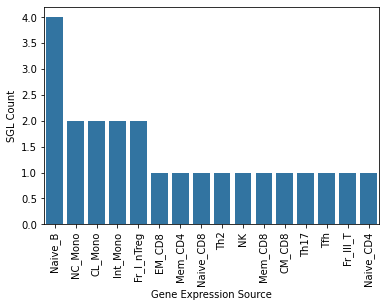

In [51]:
ge_counts = short_format.ge_source.value_counts().to_frame().reset_index()
ge_counts.columns = ['ge_source', 'sgl_count']

# make the plot
fig, ax = plt.subplots()
sns.barplot(x='ge_source', y='sgl_count', data=ge_counts, color=sns.color_palette(n_colors=1)[0])

# rotate ticks
for xtick in ax.get_xticklabels():
    xtick.set_rotation(90)
    
# set labels
ax.set_xlabel('Gene Expression Source')
ax.set_ylabel('SGL Count')

#### Count the number of times we see a loop source

Text(0, 0.5, 'SGL Count')

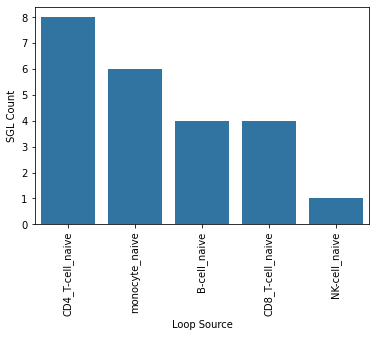

In [52]:
loop_counts = short_format.loop_source.value_counts().to_frame().reset_index()
loop_counts.columns = ['loop_source', 'sgl_count']

# make the plot
fig, ax = plt.subplots()
sns.barplot(x='loop_source', y='sgl_count', data=loop_counts, color=sns.color_palette(n_colors=1)[0])

# rotate ticks
for xtick in ax.get_xticklabels():
    xtick.set_rotation(90)
    
# set labels
ax.set_xlabel('Loop Source')
ax.set_ylabel('SGL Count')

# Looking at other situations

#### Checking out SNP-gene pairs with a loop

In [44]:
loop_data = all_data.loc[(all_data['flt.has_fithichip_loop'] == 1) & (all_data['flt.is_coloc_pair'] == 0)]

In [45]:
genelist = loop_data.genename.unique()
genelist = [x for x in genelist if not x.startswith('AP') and not x.startswith('AC') and not x.startswith('AL') and not x.startswith('MT')]

In [46]:
genelist_str = '\n'.join(genelist)

In [47]:
print(genelist_str)

RBM17
PFKFB3
RN7SKP78
MIR3155A
Y_RNA
LINC02649
SDCBPP1
LINC02656
PRKCQ
PRKCQ-AS1
LINC02648
LINP1
LINC00706
LINC00707
DDX54
RITA1
TPCN1
IQCD
PLBD2
SLC8B1
LINC01671
PDE9A
LINC01668
WDR4
NDUFV3
ERVH48-1
MIR5692B
PKNOX1
CBSL
CBS
U2AF1L5
U2AF1
MRPL51P2
FP236240.3
FP236240.2
FRGCA
FP236240.1
CRYAA
CRYAA2
LINC00322
LINC01679
MFNG
CARD10
CDC42EP1
LGALS2
GGA1
SH3BP1
Z83844.3
Z83844.2
PDXP
RN7SL385P
LGALS1
NOL12
Z83844.1
TRIOBP
snoU13
H1F0
GCAT
GALR3
MIR658
MIR659
EIF3L
ANKRD54
RNU6-900P
MICALL1
POLR2F
C22orf23
SOX10
MIR4534
PICK1
SLC16A8
BAIAP2L2
RNU6-1149P
SLC37A1
RSPH1
CDC37L1-DT
CDC37L1
AK3
ECM1P1
RCL1
KLF4P1
MIR101-2
HNRNPA1P41
JAK2
CSNK1G2P1
PDSS1P1
TCF3P1
IGHEP2
INSL6
INSL4
TRAFD1
RN7SKP71
RPL7AP60
HECTD4
PTPN11
RPL6
RPH3A
MIR1302-1
OAS1
OAS3
OAS2
IMMP1LP2
RPS15AP32
DTX1
BRAP
MAPKAPK5
MAPKAPK5-AS1
RPS2P41
ADAM1A
ADAM1B
SLC25A3P2
TMEM116
ERP29
MIR3657
NAA25
RPL41
ESYT1
ZC3H10
MYL6B
MYL6
SMARCC2
RN7SL770P
RNF41
NABP2
SLC39A5
ANKRD52
COQ10A
CS
CNPY2
PAN2
IL23A
RNU7-40P
STAT2
TIMELESS
SPRYD4


#### Checking out eQTL pairs near coloc regions

In [48]:
eqtl_pair_data = all_data.loc[(all_data['flt.is_eqtl_pair'] == 1)]

In [49]:
eqtl_pair_data

,chrA,startA,endA,chrB,startB,endB,name,score,strandA,strandB,sid,genename,geneid,flt.is_eqtl_pair,flt.is_eqtl_gene,flt.is_closest_gene,flt.is_coloc_pair,flt.has_fithichip_loop,flt.has_snp_anchor,flt.has_gene_anchor,flt.is_coloc_sgl,flt.is_eqtl_sgl,coloc.chr,coloc.pos,coloc.pp_H0_Coloc_Summary,coloc.pp_H1_Coloc_Summary,coloc.pp_H2_Coloc_Summary,coloc.pp_H3_Coloc_Summary,coloc.pp_H4_Coloc_Summary,coloc.rs_id,coloc.variant_id,coloc.dist,coloc.pvalue,coloc.FDR,coloc.slope_snp,coloc.ref,coloc.alt,coloc.AC,coloc.AF,coloc.AN,coloc.slope_se_snp,coloc.slope_gwas,coloc.slope_se_gwas,coloc.pval_nominal,coloc.old_pos,coloc.was_converted,coloc.rsID,coloc.ld_chr,coloc.ld_pos,coloc.ld_rsID,coloc.LD,coloc.id,loop.id,loop.chrA,loop.startA,loop.endA,loop.chrB,loop.startB,loop.endB,loop.score,loop.cc,loop.Coverage1,loop.isPeak1,loop.Bias1,loop.Mapp1,loop.GCContent1,loop.RESites1,loop.Coverage2,loop.isPeak2,loop.Bias2,loop.Mapp2,loop.GCContent2,loop.RESites2,loop.exp_cc_Bias,loop.p_Bias,loop.dbinom_Bias,loop.P-Value_Bias,loop.Q-Value_Bias,eqtl.chr,eqtl.pos,eqtl.beta,eqtl.pval,eqtl.fdr,eqtl.dist,eqtl.old_pos,eqtl.was_converted,gene.start,gene.end,gene.strand,gwas_source,eqtl_source,ge_source,loop_source
13,chr10,6110874,6110875,chr10,5454519,5454520,10:6110875-ENSG00000173848,.,+,+,10:6110875,NET1,ENSG00000173848,1,1,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,6110875.0,-0.054585,0.281954,0.849197,656361.0,6068912.0,1.0,5454520,5501019,+,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
23,chr10,6110874,6110875,chr10,5708557,5708558,10:6110875-ENSG00000196372,.,+,-,10:6110875,ASB13,ENSG00000196372,1,1,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,6110875.0,0.012787,0.791367,0.978323,402317.0,6068912.0,1.0,5680830,5708558,-,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
24,chr10,6110874,6110875,chr10,5726800,5726801,10:6110875-ENSG00000108021,.,+,+,10:6110875,TASOR2,ENSG00000108021,1,1,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,6110875.0,0.080688,0.088744,0.652222,384074.0,6068912.0,1.0,5726801,5805703,+,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
25,chr10,6110874,6110875,chr10,5786029,5786030,10:6110875-ENSG00000226647,.,+,-,10:6110875,AL365356.1,ENSG00000226647,1,1,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,6110875.0,-0.119694,0.024513,0.406890,324845.0,6068912.0,1.0,5754137,5786030,-,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
26,chr10,6110874,6110875,chr10,5818033,5818034,10:6110875-ENSG00000270427,.,+,+,10:6110875,NRBF2P5,ENSG00000270427,1,1,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,6110875.0,-0.081133,0.156139,0.754011,292841.0,6068912.0,1.0,5818034,5818821,+,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..